# DS 3000 - Practicum 1

**Student Names**: Ayush Zenith, Ivina Wang, Alexander Park, Benjamin Lam

**Date**: 2/4/2025


### Submission Instructions
Submit this `ipynb` file to canvas.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run `Kernel > Restart & Run All` just before uploading the `ipynb` file to Canvas.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or DM us in MS Teams if you have a specific question about your work or if you would like another pair of eyes or talk through your code.

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment. You do not need to cite the official python documentation.

**Documentation / style counts for credit**  Please refer to the Pep-8 style, to improve the readability and consistency of your Python code. For more information, read the following article [How to Write Beautiful Python Code With PEP 8](https://realpython.com/python-pep8/) or ask your TA's for tips.

**NOTE:<span style='color:red'> Write python expressions to answer ALL questions below and ensure that you use the `print()` function to display the output.</span>** Each question should be answered in a new code cell. For example, your solution for question 1.1 should be in a different code cell from your solution for question 1.2.

Note:

* Ensure that all visualizations have a title and label both the x and y axes; all numeric calculations should be rounded to 2 decimal places.
* Use markdown cells to explain your observations about the data.
* Include the names of all teammates on all submissions
* Ensure that your Python code is in a code cell and that it executes without errors.


In this practicum, you will work with data from the Bureau of Transportation Statistics. which reports the Airline/Carrier On-Time Performance from 1987 to present. The dataset contains airlines, which are also called operators/carriers, that voluntarily share its data and notify the organization about its flight hours, distance, arrival and departure delays at various airports across the US and its territories. For more information on the dataset and to learn more about the description of the fields, visit the following websiteLinks to an external site..

You are given the task of performing a comprehensive analysis of this dataset. However, due to the volume of data, a subset has been extracted for you for all flights that originated or departed from the following states in 2019: Arizona: AZ, Nevada: NV and California: CA.

The goal for this practicum is to explore flight delays to: 1) analyze the air traffic at certain airports/regions and 2) evaluate which  airlines/carriers are more prone to delays.



## Question 1 — The DS Problem

1. In your own words, formulate the Data Science problem that you were given.



The given Data Science problem can be viewed as a exploratory data analysis (EDA) in which we are analyzing flight delay data from the Bureau of Transportation Statistics to gain insights into air traffic patterns and airline performance for flights originating from Arizona (AZ), Nevada (NV), and California (CA) in 2019. Our goal is to:

* Analyze Air Traffic: Understand flight volume, busiest airports, and trends in departures and arrivals
* Evaluate Airline Delays: Identify which airlines and airports experience the most delays and uncover potential factors contributing to these delays

## Question 2 — Prepare the Data (10 pts)

1. Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types (if needed).
2. Analyze the data to determine what preprocessing steps are needed. Perform the required data preparation steps. At a minimum, ensure that you handle both missing and invalid values. Justify the approach that is taken to prepare the data for analysis.
3. At a high level, provide an overview of the dataset; prepare summary statistics and at least three visualizations to support your explanation. Note: the explanation and visualizations should be relevant to the DS Problem in question 1.



#### 2.1

In [283]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

df = pd.read_csv('2019_ONTIME_REPORTING_FSW.csv')

print('There are {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df.head()

There are 1897503 rows and 14 columns.


,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828.0,0.0,1353.0,0.0,205.0,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907.0,0.0,2159.0,0.0,112.0,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904.0,104.0,2016.0,101.0,192.0,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729.0,4.0,2215.0,3.0,166.0,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656.0,0.0,841.0,0.0,285.0,1947


In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   FL_DATE       object 
 1   CARRIER_CODE  object 
 2   TAIL_NUM      object 
 3   FL_NUM        int64  
 4   ORIGIN        object 
 5   ORIGIN_ST     object 
 6   DEST          object 
 7   DEST_ST       object 
 8   DEP_TIME      float64
 9   DEP_DELAY     float64
 10  ARR_TIME      float64
 11  ARR_DELAY     float64
 12  ELAPSED_TIME  float64
 13  DISTANCE      int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 202.7+ MB


In [285]:
df['FL_DATE'] = pd.to_datetime(df['FL_DATE'], errors='coerce') # Date
df['CARRIER_CODE'] = df['CARRIER_CODE'].astype('category') # not unique
df['TAIL_NUM'] = df['TAIL_NUM'].astype('string') # unique => str
# FL_NUM is correctly typed as int

# States and airports are categorical
df['ORIGIN'] = df['ORIGIN'].astype('category')
df['ORIGIN_ST'] = df['ORIGIN_ST'].astype('category')
df['DEST'] = df['DEST'].astype('category')
df['DEST_ST'] = df['DEST_ST'].astype('category')

# 24 hour format => Looks like whole numbers =) 
df['DEP_TIME'] = df['DEP_TIME'].astype('Int64')
df['DEP_DELAY'] = df['DEP_DELAY'].astype('Int64')
df['ARR_TIME'] = df['ARR_TIME'].astype('Int64')
df['ARR_DELAY'] = df['ARR_DELAY'].astype('Int64')
df['ELAPSED_TIME'] = df['ELAPSED_TIME'].astype('Int64')

# df['FL_CARRIER_NUM'] = df['CARRIER_CODE'] + ' ' + df['FL_NUM'].astype(str)

In [286]:
df.head()

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828,0,1353,0,205,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907,0,2159,0,112,602
2,2019-10-01,AA,N140AN,2318,DFW,TX,LAX,CA,1904,104,2016,101,192,1235
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729,4,2215,3,166,1205
4,2019-10-01,AA,N143AN,2328,ATL,GA,LAX,CA,656,0,841,0,285,1947


In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1897503 entries, 0 to 1897502
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   FL_DATE       datetime64[ns]
 1   CARRIER_CODE  category      
 2   TAIL_NUM      string        
 3   FL_NUM        int64         
 4   ORIGIN        category      
 5   ORIGIN_ST     category      
 6   DEST          category      
 7   DEST_ST       category      
 8   DEP_TIME      Int64         
 9   DEP_DELAY     Int64         
 10  ARR_TIME      Int64         
 11  ARR_DELAY     Int64         
 12  ELAPSED_TIME  Int64         
 13  DISTANCE      int64         
dtypes: Int64(5), category(5), datetime64[ns](1), int64(2), string(1)
memory usage: 152.0 MB


#### 2.2

In [288]:
df.isnull().sum()

FL_DATE             0
CARRIER_CODE        0
TAIL_NUM         4791
FL_NUM              0
ORIGIN              0
ORIGIN_ST           0
DEST                0
DEST_ST             0
DEP_TIME        26707
DEP_DELAY       26715
ARR_TIME        28244
ARR_DELAY       31884
ELAPSED_TIME    31884
DISTANCE            0
dtype: int64

In [289]:
# Removing rows that are missing more than 4 values
df = df[df.isnull().sum(axis=1) < 4]
# If you replace with 5 or more values, it gets rid of mostly the same rows except for 7 rows that have a NaN DEP_DELAY

df.loc[df['ARR_TIME'].isna(), 'ARR_TIME'] = round(df['ARR_TIME'].mean())

# Data is skewed to the left, 75%+ of ARR_DELAY is 0 => using median
df.loc[df['ARR_DELAY'].isna(), 'ARR_DELAY'] = df['ARR_DELAY'].median()
# df[df['ARR_DELAY'].isna()]
# df['ARR_DELAY'].describe()

df.loc[df['ELAPSED_TIME'].isna(), 'ELAPSED_TIME'] = round(df['ELAPSED_TIME'].mean())

df.isnull().sum()

FL_DATE         0
CARRIER_CODE    0
TAIL_NUM        0
FL_NUM          0
ORIGIN          0
ORIGIN_ST       0
DEST            0
DEST_ST         0
DEP_TIME        0
DEP_DELAY       0
ARR_TIME        0
ARR_DELAY       0
ELAPSED_TIME    0
DISTANCE        0
dtype: int64

In [290]:
# Checked for negative values
# No duplicates
# df.drop_duplicates(inplace=True)

# Getting rid of any flights not originating from AZ, NV, or CA
df = df[df['ORIGIN_ST'].isin(['AZ', 'NV', 'CA'])]
df

,FL_DATE,CARRIER_CODE,TAIL_NUM,FL_NUM,ORIGIN,ORIGIN_ST,DEST,DEST_ST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,ELAPSED_TIME,DISTANCE
0,2019-10-01,AA,N916NN,2311,TUS,AZ,ORD,IL,828,0,1353,0,205,1437
1,2019-10-01,AA,N733UW,2315,PHX,AZ,DEN,CO,1907,0,2159,0,112,602
3,2019-10-01,AA,N925AN,2325,SNA,CA,DFW,TX,1729,4,2215,3,166,1205
5,2019-10-01,AA,N816NN,2339,PHX,AZ,JFK,NY,911,0,1702,0,291,2153
6,2019-10-01,AA,N150NN,2349,LAX,CA,BOS,MA,2149,0,559,0,310,2611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897491,2019-01-31,UA,N56859,234,SFO,CA,MCO,FL,832,0,1637,0,305,2446
1897493,2019-01-31,UA,N37263,230,SNA,CA,ORD,IL,647,0,1257,3,250,1726
1897495,2019-01-31,UA,N69840,223,SFO,CA,DEN,CO,1039,0,1411,0,152,967
1897498,2019-01-31,UA,N73256,209,SNA,CA,SFO,CA,750,0,911,0,81,372


#### 2.3

## Question 3 — (20 points)

1. Explore patterns in the region i.e. the 3 states (AZ, NV, CA). Determine which region has the most air traffic. Comment on your findings and visualize the results. Note: it's important to explain your rational for determining what is "the most air traffic". For example, are you evaluating the frequency of flights or total flight time. Justify your response.
2. For each region i.e. the 3 states (AZ, NV, CA), analyze the most popular outbound/destination airports. For example, if a flight originated in CA (at any of its airports), where do they often go? Comment on your findings and visualize the results for the top 5 destinations.
3. For each region, calculate the proportion* of flights from each airline/operator. Visualize the top 10 results. Explain the results.
*Hint: Don't forget that proportion is an explicit requirement.




#### 3.1

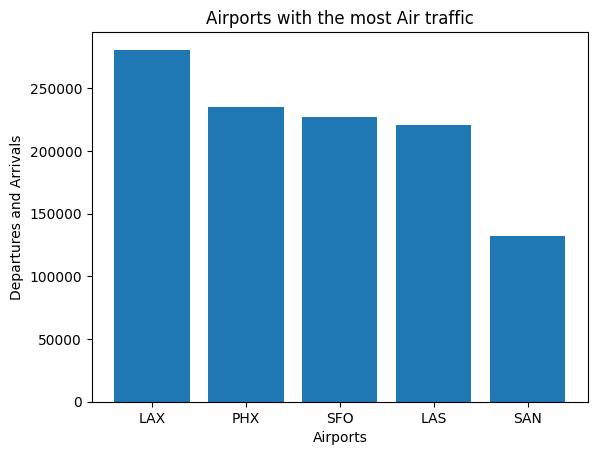

In [300]:
# Get airports with the most departures + arrivals (add the 2)
top_origin_dest = pd.concat([df['ORIGIN'], df['DEST']]).value_counts().head(5)

x_airports = top_origin_dest.index
y_count = top_origin_dest.values

plt.bar(x_airports, y_count)
plt.xlabel('Airports')
plt.ylabel('Departures and Arrivals')
plt.title('Airports with the most Air traffic')
plt.show()

some justification for later idk

#### 3.2

## Question 4 — (20 points)

1. Explore the carriers within the dataset and demonstrate at least TWO (2) patterns that you identified.
2. Analyze the minimum, maximum and average arrival and departure delays for each Airline/Carrier. Visualize the top 10 results. Explain the patterns in the delays and demonstrate: 1) which carriers are more prone to flight delays and 2) are the delays occurring more frequently in certain regions**?
**Tip: it is important to analyze the airlines across multiple airports and/or regions in order to conclude that they have a pattern of being late.



In [74]:
#Write your python code to answer question 4. You can add new cells below as needed.

## Question 5 — (30 points)

1. Evaluate which airlines have the best performance in the region. Display the top 10 airlines.
Note: it's important to explain your rational for determining "the best performance".
2. For each airline, ensure that you calculate their total flight hours for each month. Explain and visualize the results for the top 10 airlines. 
Hint: the total flight hours is not equivalent to the frequency of flights, and ensure that you display the total hours and not the total minutes.


In [75]:
#Write your python code to answer question 5. You can add new cells below as needed.

## Question 6 — (20 points)

Select any THREE (3) aircraft***, and explore the data to analyze the following for each aircraft:

1. Indicate which airline operates the selected aircraft and where it often travels.
2. Arrival and departure delays at the airports where it traveled.
3. Create summary statistics on the distance traveled.
Analyze all the results in 6.1-6.3 to identify any patterns that are evident. Explain your findings and visualize ALL results.

***Note: the TAIL_NUM can help you to identify each unique aircraft.



In [76]:
#Write your python code to answer question 6. You can add new cells below as needed.

## Question 7 — Summary

Summarize the overall analysis and share THREE (3) key findings.



In [77]:
#Write your python code to answer question 7. You can add new cells below as needed.

## Helpful resources 
Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment inside the code cell, or you can list them below. 

You do not need to cite the official python documentation.
